In [1]:
import sys
home_dir = "../"
sys.path.append(home_dir)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable
# import matplotlib.ticker as ticker
from sklearn.metrics import roc_auc_score
import seaborn as sns


In [2]:
per_sf_df = pd.read_csv('../data/SCOPe/ranking_results/prottrans_t5_bfd/superfamily/th_30/results_per_superfamily.tsv', sep='\t')

In [3]:
per_sf_df.head(10)['avg_n_true_neg'].median()

np.float64(10363.0)

In [4]:
per_fl_df = pd.read_csv('../data/SCOPe/ranking_results/prottrans_t5_bfd/fold/th_30/results_per_fold.tsv', sep='\t')

In [5]:
top_df = per_sf_df[(per_sf_df['n_queries']>5) & (per_sf_df['auroc']==1)]

des_df = pd.read_csv('../../datasets/SCOPe/dir.des.scope.2.08-stable.txt',skiprows=4,sep='\t',names=['id','level','scc','name','description'])

top_df = top_df.merge(des_df,left_on = 'superfamily',right_on='scc',how='left')#[['superfamily','description','auroc','avg_n_true_pos','n_queries']]

In [6]:
top_df

,superfamily,auroc,auprc,hit1,hit10,avg_n_true_pos,avg_n_true_neg,n_queries,id,level,scc,name,description
0,a.38.1,1.0,1.0,1.0,1.0,1.714286,10363.0,7,47459,sf,a.38.1,-,"HLH, helix-loop-helix DNA-binding domain"
1,a.39.2,1.0,1.0,1.0,1.0,4.444444,10361.0,9,47565,sf,a.39.2,-,Insect pheromone/odorant-binding proteins
2,a.64.1,1.0,1.0,1.0,1.0,4.666667,10364.0,6,47862,sf,a.64.1,-,Saposin
3,a.87.1,1.0,1.0,1.0,1.0,1.714286,10363.0,7,48065,sf,a.87.1,-,DBL homology domain (DH-domain)
4,b.22.1,1.0,1.0,1.0,1.0,1.800000,10360.0,10,49842,sf,b.22.1,-,TNF-like
5,b.74.1,1.0,1.0,1.0,1.0,1.666667,10364.0,6,51069,sf,b.74.1,-,Carbonic anhydrase
6,c.44.1,1.0,1.0,1.0,1.0,2.666667,10364.0,6,52788,sf,c.44.1,-,Phosphotyrosine protein phosphatases I
7,c.54.1,1.0,1.0,1.0,1.0,4.000000,10363.0,7,53062,sf,c.54.1,-,PTS system fructose IIA component-like
8,d.189.1,1.0,1.0,1.0,1.0,5.454545,10359.0,11,64268,sf,d.189.1,-,PX domain
9,d.95.2,1.0,1.0,1.0,1.0,5.333333,10358.0,12,55608,sf,d.95.2,-,Homing endonucleases


In [7]:
bottom_df = per_sf_df[(per_sf_df['n_queries']>5)].sort_values(by='auroc')

bottom_df = bottom_df.merge(des_df,left_on = 'superfamily',right_on='scc',how='left')[['superfamily','description','auroc','avg_n_true_pos','n_queries']]

In [8]:
bottom_df.head(10)

,superfamily,description,auroc,avg_n_true_pos,n_queries
0,d.145.1,FAD-binding/transporter-associated domain-like,0.562151,13.444444,18
1,b.52.1,Barwin-like endoglucanases,0.589824,5.142857,7
2,a.6.1,Putative DNA-binding domain,0.613686,11.076923,13
3,d.224.1,SufE/NifU,0.632059,3.142857,7
4,a.60.8,HRDC-like,0.636871,7.400000,10
5,c.97.3,JAB1/MPN domain,0.661289,1.666667,6
6,b.122.1,PUA domain-like,0.671131,28.062500,32
7,c.26.2,Adenine nucleotide alpha hydrolases-like,0.673422,22.857143,28
8,d.61.1,LigT-like,0.673455,4.000000,6
9,d.79.3,L30e-like,0.686801,5.750000,8


In [9]:
print(bottom_df.head(10).to_latex(index=False))

\begin{tabular}{llrrr}
\toprule
superfamily & description & auroc & avg_n_true_pos & n_queries \\
\midrule
d.145.1 & FAD-binding/transporter-associated domain-like & 0.562151 & 13.444444 & 18 \\
b.52.1 & Barwin-like endoglucanases & 0.589824 & 5.142857 & 7 \\
a.6.1 & Putative DNA-binding domain & 0.613686 & 11.076923 & 13 \\
d.224.1 & SufE/NifU & 0.632059 & 3.142857 & 7 \\
a.60.8 & HRDC-like & 0.636871 & 7.400000 & 10 \\
c.97.3 & JAB1/MPN domain & 0.661289 & 1.666667 & 6 \\
b.122.1 & PUA domain-like & 0.671131 & 28.062500 & 32 \\
c.26.2 & Adenine nucleotide alpha hydrolases-like & 0.673422 & 22.857143 & 28 \\
d.61.1 & LigT-like & 0.673455 & 4.000000 & 6 \\
d.79.3 & L30e-like & 0.686801 & 5.750000 & 8 \\
\bottomrule
\end{tabular}



In [10]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8, 6)  # Set the size to 10x8 inches

In [11]:
model_names_dict = {"hhblits":"HHblits","tapebert":"TAPE-BERT", "proteinbert": "ProteinBERT", "esm2_t33_650M_UR50D":"ESM2", "esm1b_t33_650M_UR50S":"ESM1b", 
                    "prottrans_bert_bfd": "Prottrans-BERT", "prottrans_albert_bfd":"Prottrans-ALBERT", "prottrans_t5_bfd":"Prottrans-T5"}
baseline_model_names_dict = {"hhblits":"HHblits"}
metric_names_dict = {"aurocs":"AUROC", "auprcs":"AUPRC", "hit1s":"Hit@1", "hit10s":"Hit@10"}
ths = [10, 20, 30, 40, 70, 95]
colors_dict = {"aurocs": ["purple", "crimson", "mediumvioletred", "hotpink", "pink", "lavenderblush"],
               "auprcs": ["darkred", "red", "orangered", "darkorange", "goldenrod", "darkkhaki"],
               "hit1s": ["darkolivegreen", "forestgreen", "teal", "cadetblue", "skyblue", "lightblue"],
               "hit10s": ["darkblue", "darkslateblue", "indigo", "darkviolet", "mediumorchid", "plum"]}

In [12]:
metrics_df = pd.DataFrame(index=ths, columns=metric_names_dict.values())

for th in ths:
    df = pd.read_csv('../data/SCOPe/ranking_results/random/superfamily/th_'+str(th)+'/weighted_results.tsv', sep='\t')
    for metric in metric_names_dict.keys():
        metrics_df.loc[th, metric_names_dict[metric]] = df[metric[:-1]].iloc[1]

metrics_df.index.name='th'

print(metrics_df.reset_index().to_latex())

\begin{tabular}{lrllll}
\toprule
{} &  th &     AUROC &     AUPRC &     Hit@1 &    Hit@10 \\
\midrule
0 &  10 &  0.494638 &  0.001422 &  0.000618 &  0.010173 \\
1 &  20 &  0.497501 &  0.001274 &  0.000582 &  0.007851 \\
2 &  30 &  0.504772 &  0.001205 &  0.000757 &  0.009426 \\
3 &  40 &  0.501371 &  0.001023 &  0.000563 &  0.006629 \\
4 &  70 &  0.498959 &  0.000832 &  0.000764 &  0.007327 \\
5 &  95 &  0.499277 &  0.000779 &  0.000719 &  0.007179 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_3922571/3537869724.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.reset_index().to_latex())


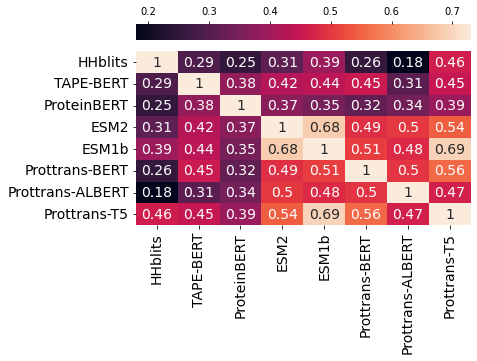

In [13]:
from sklearn.metrics import cohen_kappa_score
from scipy.stats import spearmanr

prev = per_sf_df['superfamily']
rankings = []
for mn in model_names_dict.keys():
    per_sf_df = pd.read_csv('../data/SCOPe/ranking_results/'+mn+'/superfamily/th_30/results_per_superfamily.tsv', sep='\t')
    # per_sf_df = per_sf_df[per_sf_df['n_queries']>10]
    # assert(all( prev == per_sf_df['superfamily']))
    prev = per_sf_df['superfamily']
    rankings.append(per_sf_df['auroc'])#.rank().astype(int))

len(model_names_dict.values())

agreement_matrix = pd.DataFrame(index=model_names_dict.values(), columns=model_names_dict.values())

for i, ranking1 in enumerate(rankings):
    for j, ranking2 in enumerate(rankings):
            agreement = spearmanr(ranking1, ranking2).statistic
            agreement_matrix.loc[list(model_names_dict.values())[i],list(model_names_dict.values())[j]] = agreement
            # if i==j:
            #      agreement_matrix.loc[list(model_names_dict.values())[i],list(model_names_dict.values())[j]]=0

sns.heatmap(agreement_matrix.astype(float),annot=True,vmax=0.73,cbar_kws = dict(use_gridspec=False,location="top"), annot_kws={"size": 14})
plt.xticks(fontsize=14)  # Adjust the size as needed for x-axis tick labels
plt.yticks(fontsize=14)  # Adjust the size as needed for y-axis tick labels
plt.savefig('plots_performance_comparison/intermodel_sf_difficulty_spearman.svg', bbox_inches='tight')

In [14]:
agreement_matrix_sf = agreement_matrix

In [15]:
prev = per_sf_df['superfamily']
rankings = []
scores = []
for mn in model_names_dict.keys():
    per_sf_df = pd.read_csv('../data/SCOPe/ranking_results/'+mn+'/superfamily/th_30/results_per_superfamily.tsv', sep='\t')
    per_sf_df = per_sf_df[per_sf_df['n_queries']>5]
    # assert(all( prev == per_sf_df['superfamily']))
    prev = per_sf_df['superfamily']
    rankings.append(per_sf_df['auroc'].rank().astype(int))
    scores.append(per_sf_df['auroc'])


In [16]:
compare_df = pd.DataFrame([per_sf_df['superfamily'],rankings[0],rankings[-1],scores[0],scores[-1]],
                          index=['superfamily','hhblits','prottrans-t5','hhblits_auc','prottrans-t5_auc']).T

In [17]:
compare_df  = compare_df.merge(des_df,left_on = 'superfamily',right_on='scc',how='left')

In [18]:
compare_df['diff'] = compare_df.apply(lambda row: row['hhblits_auc']-row['prottrans-t5_auc'],axis=1)

In [19]:
compare_df

,superfamily,hhblits,prottrans-t5,hhblits_auc,prottrans-t5_auc,id,level,scc,name,description,diff
0,a.1.1,218,172,0.949269,0.964874,46458,sf,a.1.1,-,Globin-like,-0.015605
1,a.100.1,83,136,0.723938,0.945092,48179,sf,a.100.1,-,6-phosphogluconate dehydrogenase C-terminal do...,-0.221154
2,a.102.1,134,282,0.849392,0.997616,48208,sf,a.102.1,-,Six-hairpin glycosidases,-0.148224
3,a.102.4,91,41,0.758018,0.819192,48239,sf,a.102.4,-,Terpenoid cyclases/Protein prenyltransferases,-0.061175
4,a.104.1,329,273,1.0,0.996931,48264,sf,a.104.1,-,Cytochrome P450,0.003069
...,...,...,...,...,...,...,...,...,...,...,...
336,g.50.1,226,285,0.957207,0.997762,57903,sf,g.50.1,-,FYVE/PHD zinc finger,-0.040555
337,g.68.1,266,144,0.987847,0.950164,100895,sf,g.68.1,-,Kazal-type serine protease inhibitors,0.037683
338,g.7.1,260,330,0.983437,0.999999,57302,sf,g.7.1,-,Snake toxin-like,-0.016562
339,g.8.1,274,269,0.993142,0.996693,57362,sf,g.8.1,-,BPTI-like,-0.003552


In [20]:
print(compare_df.sort_values(by='diff',ascending=True).head(10)[['superfamily','description','hhblits_auc','prottrans-t5_auc' ]].to_latex(index=False)
)# compare_df = compare_df.sort_values(by='diff',ascending=True).head(15)

\begin{tabular}{llll}
\toprule
superfamily &                                      description & hhblits\_auc & prottrans-t5\_auc \\
\midrule
     a.61.1 &                       Retroviral matrix proteins &    0.417873 &         0.962625 \\
    d.58.17 &               HMA, heavy metal-associated domain &         0.5 &         0.999989 \\
     d.58.3 &                  Protease propeptides/inhibitors &         0.5 &         0.999717 \\
    d.58.36 & Nitrite/Sulfite reductase N-terminal domain-like &         0.5 &         0.999572 \\
    d.58.32 &           FAD-linked oxidases, C-terminal domain &         0.5 &         0.998748 \\
     d.21.1 &                   Diaminopimelate epimerase-like &         0.5 &         0.998221 \\
     d.42.1 &                                       POZ domain &         0.5 &         0.998218 \\
     d.15.4 &                           2Fe-2S ferredoxin-like &         0.5 &         0.998138 \\
     d.37.1 &                                  CBS-domain pair &   

/tmp/ipykernel_3922571/4066552197.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(compare_df.sort_values(by='diff',ascending=True).head(10)[['superfamily','description','hhblits_auc','prottrans-t5_auc' ]].to_latex(index=False)


In [21]:
print(compare_df.sort_values(by='diff',ascending=False).head(10)[['superfamily','description','hhblits_auc','prottrans-t5_auc' ]].to_latex(index=False))

\begin{tabular}{llll}
\toprule
superfamily &                                    description & hhblits\_auc & prottrans-t5\_auc \\
\midrule
     c.97.3 &                                JAB1/MPN domain &    0.981828 &         0.661289 \\
     d.79.3 &                                      L30e-like &    0.944801 &         0.686801 \\
     b.52.2 &                                       ADC-like &    0.966957 &         0.727526 \\
     a.60.8 &                                      HRDC-like &    0.868617 &         0.636871 \\
    d.145.1 & FAD-binding/transporter-associated domain-like &    0.770466 &         0.562151 \\
    a.130.1 &                           Chorismate mutase II &    0.990725 &          0.78641 \\
     c.26.2 &       Adenine nucleotide alpha hydrolases-like &    0.872104 &         0.673422 \\
    d.224.1 &                                      SufE/NifU &    0.826914 &         0.632059 \\
      a.6.1 &                    Putative DNA-binding domain &    0.790382 &         

/tmp/ipykernel_3922571/3958990702.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(compare_df.sort_values(by='diff',ascending=False).head(10)[['superfamily','description','hhblits_auc','prottrans-t5_auc' ]].to_latex(index=False))


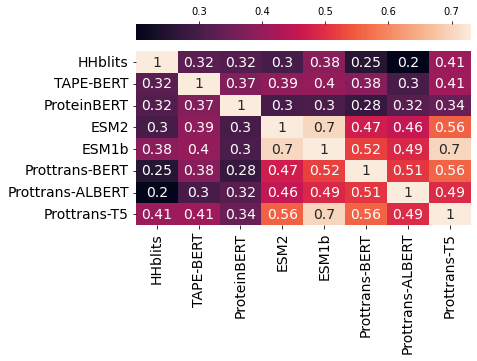

In [22]:
from sklearn.metrics import cohen_kappa_score
from scipy.stats import spearmanr
per_query_df = pd.read_csv('../data/SCOPe/ranking_results/'+mn+'/superfamily/th_30/results_per_query.tsv', sep='\t')

prev = per_query_df['superfamily']
rankings = []
for mn in model_names_dict.keys():
    per_query_df = pd.read_csv('../data/SCOPe/ranking_results/'+mn+'/superfamily/th_30/results_per_query.tsv', sep='\t')
    # per_query_df = per_query_df[per_query_df['n_queries']>10]
    assert(all( prev == per_query_df['superfamily']))
    prev = per_query_df['superfamily']
    rankings.append(per_query_df['auroc'])#.rank().astype(int))

len(model_names_dict.values())

agreement_matrix = pd.DataFrame(index=model_names_dict.values(), columns=model_names_dict.values())

for i, ranking1 in enumerate(rankings):
    for j, ranking2 in enumerate(rankings):
            agreement = spearmanr(ranking1, ranking2).statistic
            agreement_matrix.loc[list(model_names_dict.values())[i],list(model_names_dict.values())[j]] = agreement
            # if i==j:
            #      agreement_matrix.loc[list(model_names_dict.values())[i],list(model_names_dict.values())[j]]=0

sns.heatmap(agreement_matrix.astype(float),annot=True,vmax=0.73,cbar_kws = dict(use_gridspec=False,location="top"), annot_kws={"size": 14})
plt.xticks(fontsize=14)  # Adjust the size as needed for x-axis tick labels
plt.yticks(fontsize=14)  # Adjust the size as needed for y-axis tick labels
plt.savefig('plots_performance_comparison/intermodel_query_difficulty_spearman_perquery.svg', bbox_inches='tight')

In [23]:
agreement_matrix_sf

,HHblits,TAPE-BERT,ProteinBERT,ESM2,ESM1b,Prottrans-BERT,Prottrans-ALBERT,Prottrans-T5
HHblits,1.0,0.291767,0.253853,0.313143,0.393868,0.256722,0.179874,0.462916
TAPE-BERT,0.291767,1.0,0.382641,0.424956,0.435534,0.454894,0.311734,0.447122
ProteinBERT,0.253853,0.382641,1.0,0.369784,0.346944,0.321069,0.342377,0.390637
ESM2,0.313143,0.424956,0.369784,1.0,0.684355,0.490492,0.501341,0.543527
ESM1b,0.393868,0.435534,0.346944,0.684355,1.0,0.507506,0.48108,0.694865
Prottrans-BERT,0.256722,0.454894,0.321069,0.490492,0.507506,1.0,0.496454,0.557104
Prottrans-ALBERT,0.179874,0.311734,0.342377,0.501341,0.48108,0.496454,1.0,0.466481
Prottrans-T5,0.462916,0.447122,0.390637,0.543527,0.694865,0.557104,0.466481,1.0


In [24]:
rows, cols = np.triu_indices_from(agreement_matrix_sf, k=1) 

In [25]:
agreement_matrix_sf.values[rows, cols] = agreement_matrix.values[rows, cols]

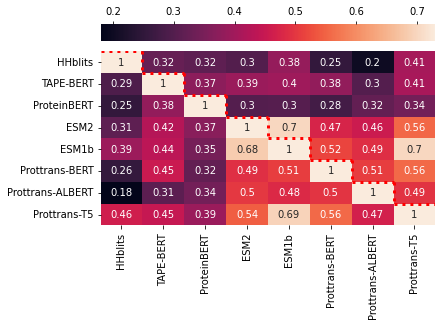

In [26]:
sns.heatmap(agreement_matrix_sf.astype(float),annot=True,vmax=0.73,cbar_kws = dict(use_gridspec=False,location="top"))
ax = plt.gca()

# Get the dimensions of the matrix
n = agreement_matrix_sf.shape[0]

# Draw a dotted red line following the cell borders above the diagonal
for k in range(n):
    i=k-1
    j=i+1
    ax.plot([j, j+1], [i+1, i+1], color='red', linestyle=':', linewidth=3)
    # Right border
    ax.plot([j, j], [i, i+1], color='red', linestyle=':', linewidth=3)
plt.savefig('plots_performance_comparison/intermodel_query_and_sf_difficulty_spearman_perquery.svg', bbox_inches='tight')

In [27]:
from scipy.stats import spearmanr
spearmanr(rankings[2],rankings[1]).statistic

0.3745211688847053

In [28]:
def get_models_performance_dicts(data_name, remote_homology_level, results_type, model_names):
    results = {}
    for model_idx, model_name  in enumerate(model_names):
        aurocs, auprcs, hit1s, hit10s = [], [], [], []
        for th in ths:
            results_df = pd.read_csv(home_dir+f"data/{data_name}/ranking_results/{model_name}/{remote_homology_level}/th_{th}/{results_type}_results.tsv", sep="\t")
            mean_perf = results_df[results_df["index"]=="mean"]
            
            auroc, auprc, hit1, hit10 = mean_perf["auroc"].values[0],  mean_perf["auprc"].values[0],  mean_perf["hit1"].values[0],  mean_perf["hit10"].values[0]
            aurocs.append(auroc)
            auprcs.append(auprc)
            hit1s.append(hit1)
            hit10s.append(hit10)
        results[model_name] = {"aurocs": aurocs, "auprcs": auprcs, "hit1s": hit1s, "hit10s":hit10s}
    # break
    return results

# get_models_performance_dicts(model_names_dict.keys())


# setting the plot title to span the plot width
def add_title_spanning_width(ax, title_str):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("top", size="13%", pad=0.04)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.spines['top'].set_visible(False)
    cax.spines['right'].set_visible(False)
    cax.spines['bottom'].set_visible(False)
    cax.spines['left'].set_visible(False)
    cax.set_facecolor('silver')
    at = AnchoredText(title_str, loc=10, pad=0, borderpad=0,
                    prop=dict(backgroundcolor='silver', size=15, color='black'))
    cax.add_artist(at)

In [29]:
metrics_dct =  get_models_performance_dicts("SCOPe", "superfamily", "weighted", ["prottrans_t5_bfd",'esm2_t33_650M_UR50D'])
print(metrics_dct["prottrans_t5_bfd"]['aurocs'][-1]-metrics_dct["prottrans_t5_bfd"]['aurocs'][0])
print(metrics_dct["esm2_t33_650M_UR50D"]['aurocs'][-1]-metrics_dct["esm2_t33_650M_UR50D"]['aurocs'][0])

0.04179567105196058
0.09229677099072287


In [30]:
metrics_dct

{'prottrans_t5_bfd': {'aurocs': [0.9181946566770802,
   0.919487827101615,
   0.9302647987738516,
   0.9415699664622994,
   0.95583413999984,
   0.9599903277290408],
  'auprcs': [0.3536365282104223,
   0.371047031895207,
   0.4256171337810802,
   0.4827342107947327,
   0.5520060005723313,
   0.5595252414046581],
  'hit1s': [0.4688880055298028,
   0.4960579513337931,
   0.572727048783913,
   0.6420337040909644,
   0.7410660155954569,
   0.7560301004869351],
  'hit10s': [0.6368732035291795,
   0.6581394962776731,
   0.7089122071013654,
   0.7548769407017166,
   0.8230850285798251,
   0.8290966887816732]},
 'esm2_t33_650M_UR50D': {'aurocs': [0.7881253655861541,
   0.7956669756172163,
   0.8128206351729476,
   0.839756809490423,
   0.8671671679733184,
   0.880422136576877],
  'auprcs': [0.1940667830684355,
   0.2011214033765385,
   0.2466704641741698,
   0.3055033958446378,
   0.3862151098958741,
   0.3963794049615686],
  'hit1s': [0.3147400112224598,
   0.3314995576181962,
   0.4176288649

In [31]:
metrics_dct =  get_models_performance_dicts("SCOPe", "fold", "weighted", ["prottrans_t5_bfd",'esm2_t33_650M_UR50D'])
print(metrics_dct["prottrans_t5_bfd"]['aurocs'][-1]-metrics_dct["prottrans_t5_bfd"]['aurocs'][0])
print(metrics_dct["esm2_t33_650M_UR50D"]['aurocs'][-1]-metrics_dct["esm2_t33_650M_UR50D"]['aurocs'][0])

0.01525367292100277
0.05858629889033884


In [32]:
metrics_dct["esm2_t33_650M_UR50D"]['aurocs'][-1]

0.6765084857397596

In [33]:
metrics_dct =  get_models_performance_dicts("SCOPe", "fold", "weighted", model_names_dict.keys())


pd.DataFrame({k:v[metric] for k,v in metrics_dct.items()}).round(2)

for metric in metric_names_dict.keys():
    print(metric_names_dict[metric])
    print(pd.DataFrame({model_names_dict[k]:v[metric] for k,v in metrics_dct.items()}).round(2).to_latex(index=False,header=False))


AUROC
\begin{tabular}{rrrrrrrr}
\toprule
0.62 & 0.75 & 0.70 & 0.62 & 0.64 & 0.60 & 0.61 & 0.73 \\
0.62 & 0.75 & 0.71 & 0.62 & 0.64 & 0.59 & 0.61 & 0.73 \\
0.62 & 0.76 & 0.72 & 0.62 & 0.64 & 0.59 & 0.60 & 0.73 \\
0.61 & 0.76 & 0.73 & 0.63 & 0.64 & 0.60 & 0.58 & 0.73 \\
0.62 & 0.78 & 0.76 & 0.65 & 0.65 & 0.58 & 0.59 & 0.74 \\
0.63 & 0.79 & 0.78 & 0.68 & 0.67 & 0.59 & 0.60 & 0.75 \\
\bottomrule
\end{tabular}

AUPRC
\begin{tabular}{rrrrrrrr}
\toprule
0.07 & 0.04 & 0.03 & 0.03 & 0.06 & 0.02 & 0.02 & 0.07 \\
0.07 & 0.04 & 0.03 & 0.03 & 0.06 & 0.02 & 0.02 & 0.07 \\
0.07 & 0.05 & 0.03 & 0.03 & 0.06 & 0.02 & 0.02 & 0.06 \\
0.08 & 0.05 & 0.02 & 0.04 & 0.06 & 0.02 & 0.02 & 0.07 \\
0.07 & 0.05 & 0.02 & 0.03 & 0.06 & 0.02 & 0.02 & 0.06 \\
0.09 & 0.04 & 0.02 & 0.03 & 0.06 & 0.02 & 0.02 & 0.06 \\
\bottomrule
\end{tabular}

Hit@1
\begin{tabular}{rrrrrrrr}
\toprule
0.04 & 0.10 & 0.05 & 0.09 & 0.15 & 0.05 & 0.06 & 0.15 \\
0.04 & 0.10 & 0.05 & 0.09 & 0.15 & 0.05 & 0.06 & 0.14 \\
0.04 & 0.10 & 0.05 & 0.09

/tmp/ipykernel_3922571/3331821902.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame({model_names_dict[k]:v[metric] for k,v in metrics_dct.items()}).round(2).to_latex(index=False,header=False))
/tmp/ipykernel_3922571/3331821902.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame({model_names_dict[k]:v[metric] for k,v in metrics_dct.items()}).round(2).to_latex(index=False,header=False))
/tmp/ipykernel_3922571/3331821902.py:8: FutureWarn

In [34]:
pd.DataFrame(metrics_dct)

,hhblits,tapebert,proteinbert,esm2_t33_650M_UR50D,esm1b_t33_650M_UR50S,prottrans_bert_bfd,prottrans_albert_bfd,prottrans_t5_bfd
aurocs,"[0.6219020687832824, 0.6221466275421035, 0.616...","[0.7508620839372085, 0.7481317500647876, 0.759...","[0.699623177509567, 0.7064021157640448, 0.7220...","[0.6179221868494208, 0.6174252305805036, 0.621...","[0.6413624682437592, 0.63966346017454, 0.63717...","[0.5980906954898556, 0.5947695884929289, 0.588...","[0.6070816661543132, 0.606112249081163, 0.5984...","[0.7336324764235646, 0.7305212157242362, 0.726..."
auprcs,"[0.0711751464662684, 0.0700404415428829, 0.072...","[0.0445974125948968, 0.0440567130158636, 0.046...","[0.0261013691176267, 0.0253705304687018, 0.025...","[0.0328159444363518, 0.0310691305229906, 0.027...","[0.0589611724127339, 0.0573399680547765, 0.055...","[0.0212057179362008, 0.0207921493901456, 0.019...","[0.0209718549719996, 0.0212920253791927, 0.019...","[0.0692049804776737, 0.0660846890154372, 0.062..."
hit1s,"[0.0401933959607266, 0.0416044904675147, 0.043...","[0.0975382641618816, 0.0984340223308584, 0.104...","[0.0466182284085783, 0.0459360170780176, 0.048...","[0.0926070155523951, 0.0910518648648821, 0.091...","[0.1511610178931205, 0.1479585583372673, 0.154...","[0.0490227020804226, 0.0503992464409372, 0.050...","[0.062416265735919, 0.0635696641536761, 0.0641...","[0.1460365730407194, 0.1410456556056432, 0.136..."
hit10s,"[0.0574965908044702, 0.0578402239275925, 0.062...","[0.2504301831239464, 0.2430908532303572, 0.247...","[0.1314263668686425, 0.131546371295807, 0.1380...","[0.1991738675424788, 0.1962433871796202, 0.202...","[0.2750724479879091, 0.2737053392571981, 0.266...","[0.1418477822876298, 0.1374178013362019, 0.133...","[0.1641090940017001, 0.1591263882151185, 0.157...","[0.2710989886745598, 0.2654754542408221, 0.255..."


In [35]:
from matplotlib.lines import Line2D
def do_plotting(data_name, remote_homology_level, results_type, metric_name, save_plot=False):
    plt.rcParams['font.size'] = 15
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, height_ratios=[8, 1])
    fig.tight_layout()
    plt.subplots_adjust(hspace=0)

    # setting each subplot background-color, grid, and removing border
    for ax in [ax1, ax2]:
        ax.set(facecolor="gainsboro")
        ax.set_axisbelow(True) # this will show the scatter points above the grid
        ax.grid(True, linestyle="--", c="white")
        for x in ["top", "bottom", "left", "right"]:
            ax.spines[x].set_visible(False)


    # add_title_spanning_width(ax1, "           Protein LMs")
    # plt.text(0.06, 0.27, ' '*8, ha='center', va='bottom', fontsize=13, fontweight='bold', bbox=dict(facecolor='lightgray', edgecolor='lightblue'))
    # plt.text(0.075, 0.34, ' '*12, ha='center', va='bottom', fontsize=14,bbox=dict(facecolor='lightgray', edgecolor='lightgray', pad=10.5))
    # plt.text(0.07, 0.34, 'Baseline', ha='center', va='bottom', fontsize=14,bbox=dict(facecolor='lightgray', edgecolor='lightgray', pad=5.5))

    legend_designs, legend_labels = [], []
    for i, color in enumerate(colors_dict[metric_name]):
        legend_designs.append(Line2D([0], [0], color=color, lw=3, marker="o", markersize=10))
        legend_labels.append(f"th={str(ths[i])}")


    models_results = get_models_performance_dicts(data_name, remote_homology_level, results_type, model_names_dict.keys())
    for model_idx, model_name in enumerate(model_names_dict.keys()):
        metrics = models_results[model_name][metric_name]
        # auprcs = models_results[model_name]["auprcs"]
        # hit1s = models_results[model_name]["hit1s"]
        # hit10s = models_results[model_name]["hit10s"]
        ax1.scatter([model_idx]*len(ths), metrics, c=colors_dict['aurocs'], s=60)
        # ax1.legend(legend_designs, legend_labels, loc="lower center", ncols=len(ths)//2, bbox_to_anchor=(0.3, -.98), fontsize=10.5)
    ax1.set_ylim(top=1.0)
    ax1.set_ylabel(metric_names_dict[metric_name], fontsize=20)

    random_baseline_results = get_models_performance_dicts(data_name, remote_homology_level, results_type, ["random"])
    random_metrics = np.mean(random_baseline_results["random"][metric_name])
    ax2.axhline(random_metrics, color="r", linestyle="--", linewidth=2)

    model_names = list(model_names_dict.values())
    # if metric_name in ["aurocs", "auprcs"]:
    #     ax2.set_xticklabels([])
    # else:
    ax2.set_xticks(ticks=range(len(model_names_dict)), labels=model_names, rotation='vertical', fontsize=20)
    ax2.set_ylim(bottom=random_metrics-.02, top=random_metrics+.04)
            
    if save_plot:
        out_dir = home_dir+f"analysis/plots_performance_comparison/{data_name}/{remote_homology_level}/"
        os.makedirs(out_dir, exist_ok=True)
        plt.savefig(f"{out_dir}{results_type}_{metric_name}.svg", dpi=300, format="svg", bbox_inches='tight', pad_inches=0.05)
    plt.show()

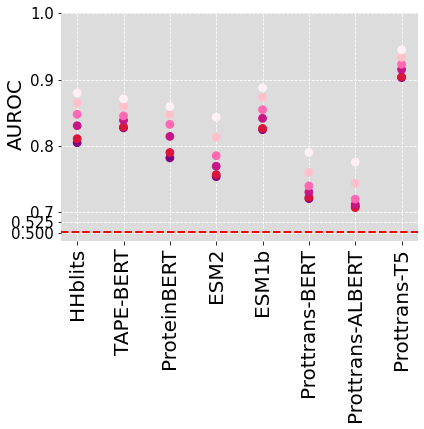

In [36]:
# for debugging, evaluate results for one set of data
data_name = "SCOPe" # SCOP, SCOPe
remote_homology_level = "superfamily"  # superfamily, fold
results_type = "non_weighted" # non_weighted, weighted
metric_name = "aurocs" # aurocs, auprcs, hit1s, hit10s
do_plotting(data_name, remote_homology_level, results_type, metric_name, save_plot=False)

In [12]:
!ls ../data/SCOP/ranking_results_cdhit_repseq/

esm1b_t33_650M_UR50S  proteinbert	    prottrans_bert_bfd	random
esm2_t33_650M_UR50D   prottrans_albert_bfd  prottrans_t5_bfd	tapebert


SCOPe superfamily non_weighted aurocs


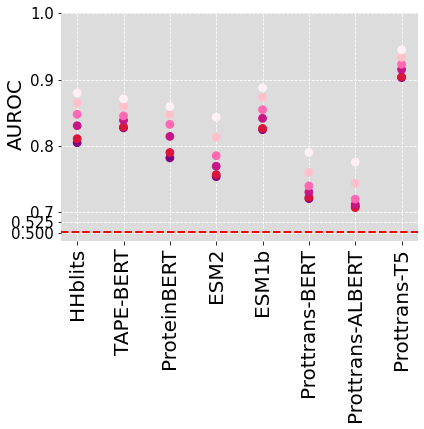

SCOPe superfamily non_weighted auprcs


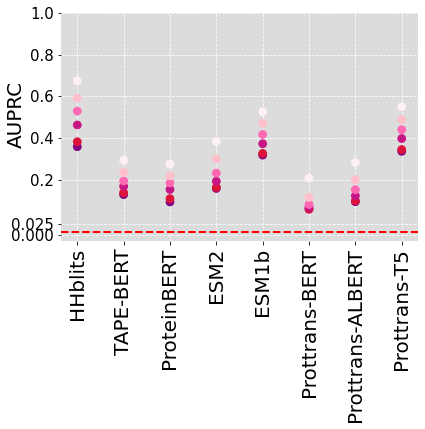

SCOPe superfamily non_weighted hit1s


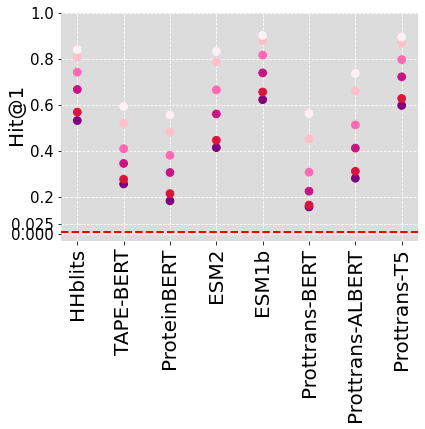

SCOPe superfamily non_weighted hit10s


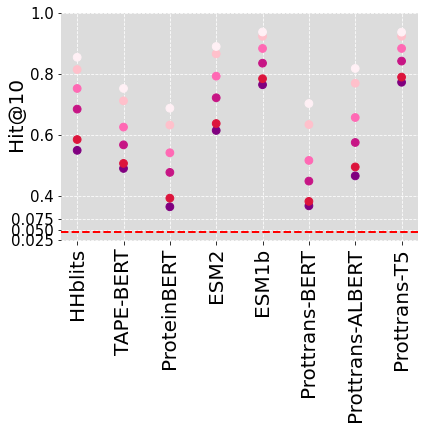

SCOPe superfamily weighted aurocs


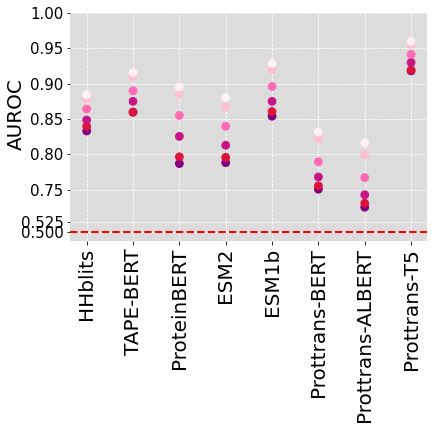

SCOPe superfamily weighted auprcs


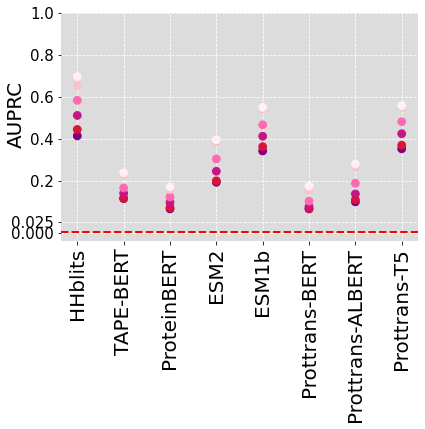

SCOPe superfamily weighted hit1s


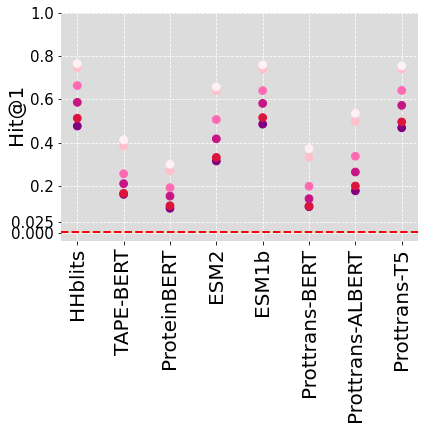

SCOPe superfamily weighted hit10s


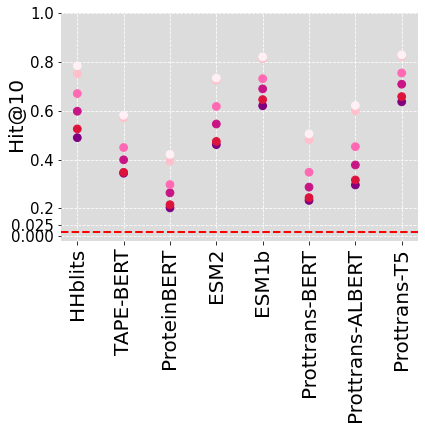

SCOPe fold non_weighted aurocs


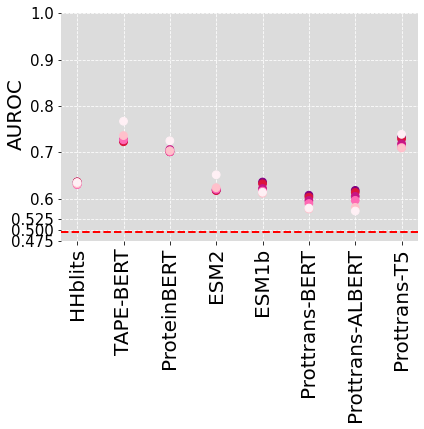

SCOPe fold non_weighted auprcs


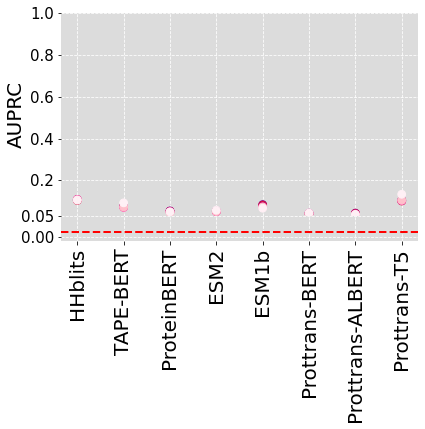

SCOPe fold non_weighted hit1s


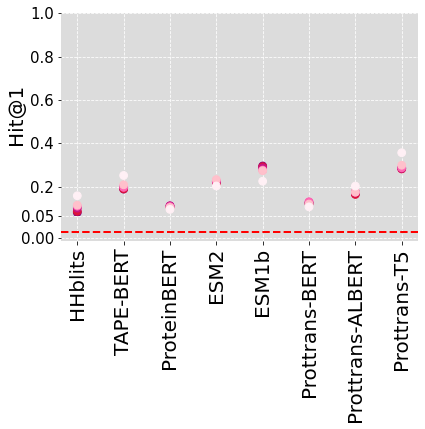

SCOPe fold non_weighted hit10s


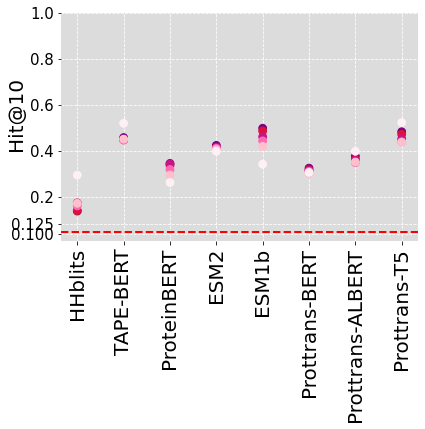

SCOPe fold weighted aurocs


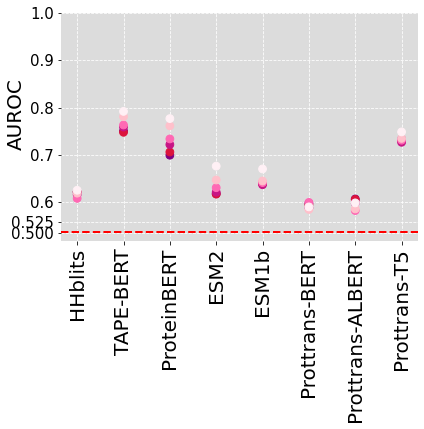

SCOPe fold weighted auprcs


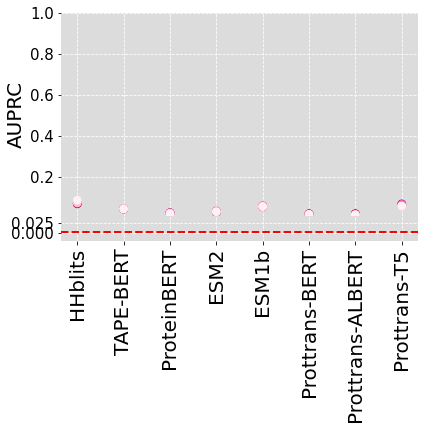

SCOPe fold weighted hit1s


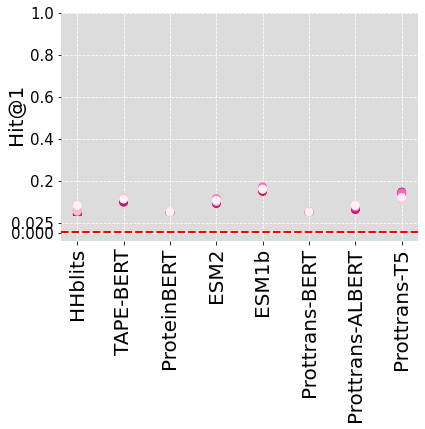

SCOPe fold weighted hit10s


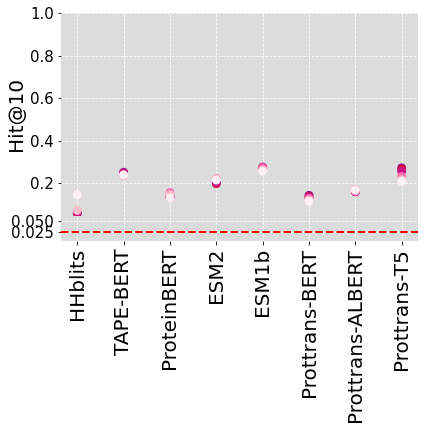

In [22]:
# to run for all combination of data
for data_name in ["SCOPe"]: # "SCOPe"
    for remote_homology_level in ["superfamily", "fold"]:
        for results_type in ["non_weighted", "weighted"]:
            for metric_name in ["aurocs", "auprcs", "hit1s", "hit10s"]:
                print(data_name, remote_homology_level, results_type, metric_name)
                do_plotting(data_name, remote_homology_level, results_type, metric_name, save_plot=True)
    #             break
    #         break
    #     break
    # break